In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn import metrics
%matplotlib inline  

# Lee dataset

In [2]:
lista_attr = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        line.strip()
        initia = line.find('[')
        lista_list = [float(x) for x in line[initia + 1: -2].split(', ')]
        lista_attr.append(lista_list)


# PCA

In [3]:
X = np.array(lista_attr)
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X) 

In [4]:
print(pca.explained_variance_ratio_)
print(X_new.shape)
print(X_new)

[ 0.09677511  0.05886284  0.04549392  0.0336914   0.02658878  0.02501407
  0.02369812  0.02124501  0.01907082  0.01629285  0.01416668  0.01343007
  0.01297935  0.01197357  0.01121607  0.01039287  0.0093623   0.00887111
  0.00817023  0.00741812  0.00722397  0.00699888  0.00679285  0.0063146
  0.00619671  0.00586309  0.0056263   0.00529969  0.00510283  0.00481783
  0.00443306  0.00438448  0.0043636   0.00398347  0.00382853  0.00372651
  0.00355252  0.00351112  0.00331399  0.00327726  0.00317488  0.00308431
  0.00301238  0.00291279  0.00283595  0.00273713  0.00261588  0.00257933
  0.00256809  0.0025156 ]
(4214, 50)
[[ 107.86096449 -106.96748849  173.17571537 ...,  -28.7616532    36.69212687
    52.04605878]
 [ -20.16786548   56.97777189 -142.40258096 ...,  -16.89015055
   -18.82575694  -11.92782096]
 [ 230.29590346 -136.36689034  110.90210589 ...,    1.47581079
     6.12474659   20.73272912]
 ..., 
 [  32.55423293  -24.75614384  -77.3263594  ...,  -14.94910705
    -5.84485443    1.9296628

In [5]:
X_backup = X_new

# KMeans

In [6]:
k1 = 10
k2 = 20
k3 = 30
klist = [k1,k2,k3]
labels = []
centroids = []
silavg = []
for k in klist :
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_new)
    cluster_labels = kmeans.labels_
    labels += [cluster_labels]
    centroids += [kmeans.cluster_centers_]
    silhouette_avg = silhouette_score(X_new, cluster_labels, metric='euclidean')
    print(silhouette_avg)
    print(metrics.calinski_harabaz_score(X_new, cluster_labels))
#Silhoutte Score 

0.0539016676619
194.168742432
0.0590145981185
126.589576846
0.0633487370393
98.0076331384


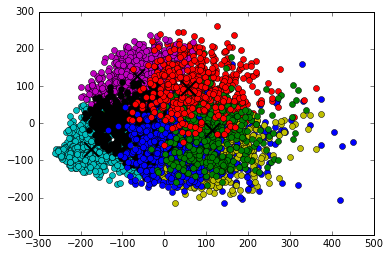

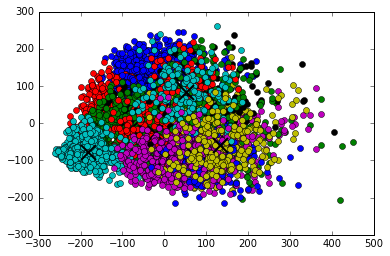

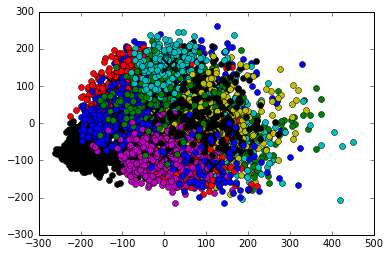

In [7]:
#Plot de cada K
n = 0
for k in klist :
    for i in range(k):
        # select only data observations with cluster label == i
        ds = X_new[np.where(labels[n]==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = plt.plot(centroids[n][i,0],centroids[n][i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    n += 1
    plt.show()

In [8]:
for cen in labels:
    c = 0
    for cent in cen:
        c+=1
    print(c)
print(labels)
print(centroids)

4214
4214
4214
[array([8, 9, 0, ..., 7, 9, 9]), array([19, 17,  1, ...,  5, 17, 17]), array([ 3, 14, 17, ..., 27, 15, 15])]
[array([[  1.75114863e+02,  -5.00314802e+01,  -8.09114895e+01,
          9.36419540e+01,   5.97309018e+01,  -1.69917169e+01,
          6.58589893e+01,   4.74228437e+01,   6.68631887e+00,
          2.05296334e+01,   8.29345152e+00,   2.71143534e+01,
          3.39814864e+01,   2.52598107e+01,  -3.89815529e+01,
          4.83552523e+01,  -9.45142570e+00,   6.50662424e+00,
          2.76492851e+01,   4.45097776e+00,  -1.08363331e+01,
          9.87113343e+00,   1.52437046e+00,   1.17094805e+01,
          5.62555054e+00,  -5.97907507e+00,   6.28428953e+00,
          1.20089575e+01,   1.46434295e-02,  -1.37416084e+00,
         -4.79202455e+00,  -6.36776256e-01,  -1.67038084e+00,
          7.07956699e+00,   4.61108440e+00,  -5.43610679e+00,
         -2.20438822e+00,   4.88740188e+00,  -1.01962476e+01,
         -6.09182864e-01,  -1.39559722e+00,  -4.50112850e-01,
       

# MeanShift

In [9]:
bandwidth = estimate_bandwidth(X_new)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_new)
labels_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_
n_clusters_ = labels_ms.max()+1
print(n_clusters_)
print(labels_ms)
print(bandwidth)

12
[0 0 0 ..., 0 0 0]
369.421354888


In [10]:
silhouette_avg = silhouette_score(X_new, labels_ms)
print(silhouette_avg)
print(metrics.calinski_harabaz_score(X_new, labels_ms))

0.211661196553
14.2584490327


In [ ]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_new[np.where(labels_ms==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(cluster_centers_ms[i,0],cluster_centers_ms[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

# DBSCAN

In [39]:
db = DBSCAN(eps = 100, min_samples = 4,n_jobs=-1).fit(X_new)
db1 = DBSCAN(eps = 270, min_samples = 3,n_jobs=-1).fit(X_new)
db2 = DBSCAN(eps = 300, min_samples = 2,n_jobs=-1).fit(X_new)
dblabels = db.labels_
dblabels1 = db1.labels_
dblabels2 = db2.labels_

n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_clusters_1 = len(set(dblabels1)) - (1 if -1 in dblabels1 else 0)
n_clusters_2 = len(set(dblabels2)) - (1 if -1 in dblabels2 else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of clusters: %d' % n_clusters_2)

Estimated number of clusters: 3
Estimated number of clusters: 8
Estimated number of clusters: 14


In [12]:
print(silhouette_score(X_new, dblabels))
print(silhouette_score(X_new, dblabels1))
print(silhouette_score(X_new, dblabels2))
print(metrics.calinski_harabaz_score(X_new, dblabels))
print(metrics.calinski_harabaz_score(X_new, dblabels1))
print(metrics.calinski_harabaz_score(X_new, dblabels2))

-0.113408803382
0.0949635576756
0.134220720309
54.7369792088
23.7798570361
10.0734087297


In [13]:
np.set_printoptions(threshold=np.inf)
print(dblabels)
print(dblabels1)
print(dblabels2)

[-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1

In [14]:
X_backup = X_new

In [50]:
modelo = TSNE(n_components = 2, perplexity = 500,early_exaggeration=25,n_iter=3000)
np.set_printoptions(suppress=True)
t_sne=modelo.fit_transform(X_backup)

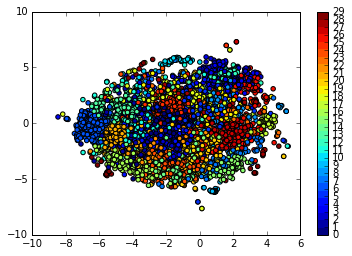

In [51]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#500-25

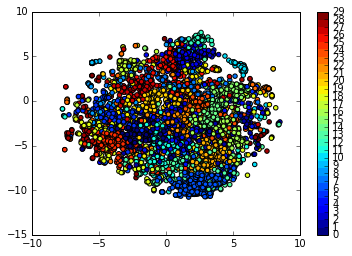

In [49]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#200-15

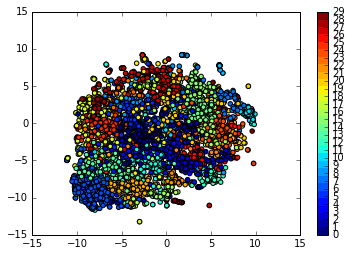

In [47]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#100-15

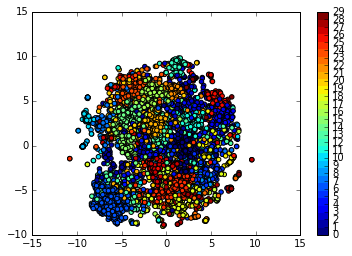

In [45]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#100-10

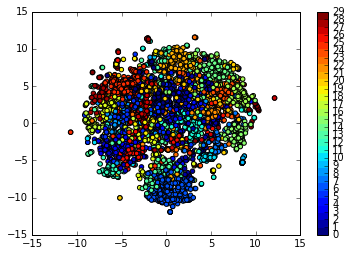

In [43]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#100-8

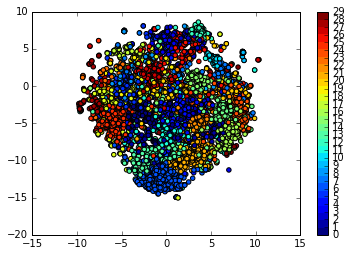

In [41]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#100

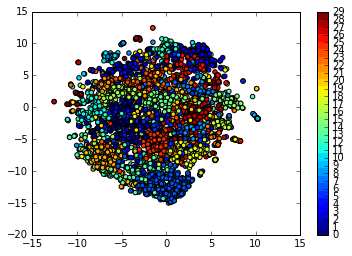

In [38]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#70

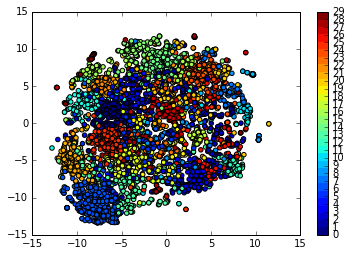

In [36]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("jet", 30))
plt.colorbar(ticks=range(30))
plt.show()
#50

In [19]:
print(t_sne)

[[ 4.32906188  5.42664189]
 [-6.85680359  0.73300861]
 [ 5.42532483  3.071144  ]
 [-0.88676829 -5.25175096]
 [-3.73712792  3.16758165]
 [-1.53804389 -7.5068865 ]
 [-6.98290207 -5.39594192]
 [ 2.41325587  7.15778473]
 [ 4.17929484  6.42447265]
 [ 3.11378457  4.83206188]
 [ 5.11966752  0.28298967]
 [ 3.21796202 -6.09766789]
 [ 2.55352859 -0.76219945]
 [-0.18314044 -4.13994295]
 [ 1.5380169  -0.47589335]
 [ 3.3050224   2.75551713]
 [ 0.39329896  2.98438682]
 [-3.36740465  4.2294252 ]
 [-2.74387803  4.44044629]
 [ 1.74334213  6.3148155 ]
 [ 1.13608901 -1.16119611]
 [ 1.99892746 -1.46442998]
 [ 4.17959249  3.93763698]
 [ 4.33716868 -2.90155229]
 [ 3.44745953 -3.51388762]
 [ 5.13683484 -3.61545245]
 [-1.14596423  4.45382992]
 [-4.14682932  4.08298736]
 [-3.06358751  3.7938989 ]
 [ 0.42665096  6.15498623]
 [-0.96020141  7.44750914]
 [ 0.89795633  6.99972113]
 [ 2.54667798 -5.30222594]
 [ 1.79438174 -4.50190578]
 [ 2.6396324  -3.42092518]
 [ 4.40026726  5.04486215]
 [ 4.45687251  0.55311163]
 

# T-SNE

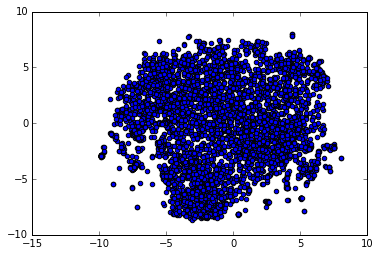

In [22]:
for i in t_sne:
    plt.scatter(i[0], i[1])

# CSV

In [ ]:
ids = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        id_start = line.find('/', 3)
        id_end = line.find('.', 3)
        ids.append(int(line[id_start+1:id_end]))
        
x = []
y = []
for t in t_sne:
    x.append(t[0])
    y.append(t[1])


DataSet = list(zip(ids, x, y))
df = pd.DataFrame(data = DataSet, columns=['Id', 'x', 'y'])
df
df.to_csv('datas.csv',index=False,header=False)